In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tifffile
from scipy.optimize import curve_fit

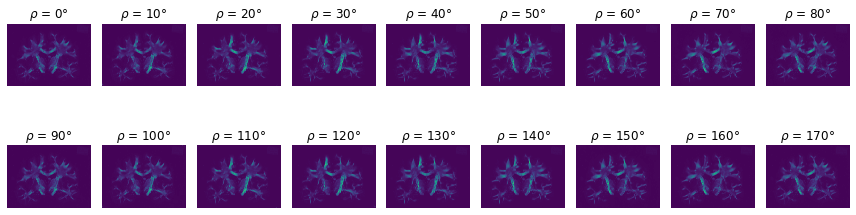

In [2]:
#Task 2.2 Load the images and extract the green channel
white_matter1 = []
white_matter2 = []
gray_matter1 = []
gray_matter2 = []
imagesList = []
rotationAngle = np.linspace(0, 170, num=18, dtype= int)
for k in range(0,180,10):
    image = tifffile.imread("expr2\exp2_t{:03d}.tif".format(k))
    gr = image[:,:,1]
    imagesList.append(gr)
    white_matter1.append(gr[1916][796])
    white_matter2.append(gr[1552][1300])
    gray_matter1.append(gr[724][1044])
    gray_matter2.append(gr[1044][704])
img = np.array(imagesList)
plt.figure(figsize =(12,4))
for k in range(len(img)):
    plt.subplot(2,9,k+1)
    plt.title(r"$\rho$ = " + str(rotationAngle[k]) + "°")
    plt.imshow(img[k,:,:])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [3]:
whitePixel = [[1916,796],[1552,1300]]
greyPixel = [[788,1072], [1044,704]]
randmPixel = whitePixel + greyPixel

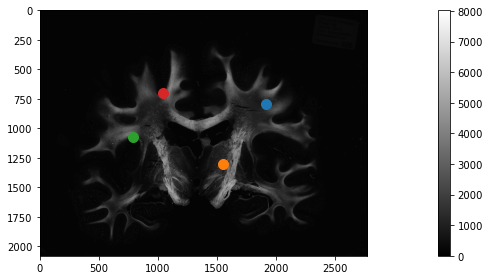

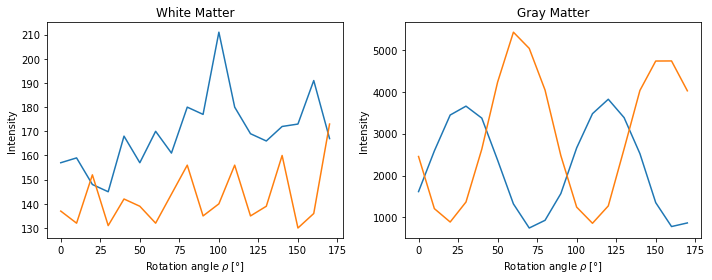

In [4]:
fig = plt.figure(figsize=(20, 4))
plt.imshow(np.mean(img,axis=0),cmap="gist_gray")
plt.colorbar()
plt.tight_layout()
for pixel in randmPixel:
    plt.scatter(pixel[0],pixel[1],marker="o",s=100)
plt.figure(figsize=(10, 4))
plt.subplot(121)
for pixel in whitePixel:
    plt.plot(rotationAngle,img[:,pixel[0],pixel[1]])
    plt.title('White Matter')
    plt.xlabel('Rotation angle '+ r'$\rho$ [°]')
    plt.ylabel('Intensity')
plt.subplot(122)
for pixel in greyPixel:
    plt.plot(rotationAngle,img[:,pixel[0],pixel[1]]) 
    plt.title('Gray Matter')
    plt.xlabel('Rotation angle '+ r'$\rho$ [°]')
    plt.ylabel('Intensity')
plt.tight_layout()
plt.show()

In [5]:
def calcFourierParam(intensity, rotationAngle, name):
    a0 = np.mean(intensity)
    a1 = 2*np.mean(intensity*np.sin(2*rotationAngle/180*np.pi))
    b1 = 2*np.mean(intensity*np.cos(2*rotationAngle/180*np.pi))

    transmittance = 2*a0
    retardance = (np.sqrt(a1**2 + b1**2))/a0
    direction_angle = (np.arctan2(-1*a1,b1))/2
    print(name,':') 
    print("\tFourier transmittance: " + str(transmittance))
    print("\tFourier retardance: " + str(retardance))
    print("\tFourier direction_angle: " + str(direction_angle))
    return a0 + a1*np.sin(2*rotationAngle/180*np.pi) +b1*np.cos(2*rotationAngle/180*np.pi)

#def calcsin(rho, I, phi, d):
#    return I/4*(1 + np.sin(d/180*np.pi)*np.sin(2*(rho - phi)/180*np.pi))

#def calcsin(rho, I, phi, d):
#   return I/2*(1 + np.sin(2*(rho - phi)/180*np.pi)*np.sin(d/180*np.pi))

def calcsin(rho, I, phi, d):
    return I * np.sin(2 * ( rho -  phi)/ 180 * np.pi) + d

def plotIntensities(intensity, rotationAngle, name):
    Fourier = calcFourierParam(intensity, rotationAngle, name)
    [transmittance, direction_angle, retardance], _ = curve_fit(calcsin, rotationAngle, intensity)
    print(name,':')
    print("\tsin transmittance: " + str(transmittance))
    print("\tsin retardance: " + str(retardance))
    print("\tsin direction_angle: " + str(direction_angle))
    Sin = calcsin(rotationAngle, transmittance, direction_angle, retardance)
    plt.figure()
    plt.plot(rotationAngle, Fourier, 'kx', label="fourier")
    plt.plot(rotationAngle, Sin, 'r-', label="Sine")
    plt.plot(rotationAngle, intensity, 'b--', label = "original")
    plt.xlabel('Rotation angle '+ r'$\rho$ [°]')
    plt.ylabel('Intensity')
    plt.title(name)
    plt.legend()

white matter 1 :
	Fourier transmittance: 339.0
	Fourier retardance: 0.08322055957736012
	Fourier direction_angle: 1.180278638421393
white matter 1 :
	sin transmittance: -14.105885218517663
	sin retardance: 169.50000000000128
	sin direction_angle: 157.37501536800272
white matter 2 :
	Fourier transmittance: 285.44444444444446
	Fourier retardance: 0.019894090628856692
	Fourier direction_angle: 0.7377354110970161
white matter 2 :
	sin transmittance: -2.8393282873054893
	sin retardance: 142.7222222223322
	sin direction_angle: 2.7308935640316183
gray matter 1 :
	Fourier transmittance: 6080.777777777777
	Fourier retardance: 0.030851702790044802
	Fourier direction_angle: -1.4338089239656588
gray matter 1 :
	sin transmittance: 93.80116259187575
	sin retardance: 3040.3888888869415
	sin direction_angle: 37.15123282910857
gray matter 2 :
	Fourier transmittance: 5924.222222222223
	Fourier retardance: 0.046300013353115434
	Fourier direction_angle: -1.044484575952542
gray matter 2 :
	sin transmittanc

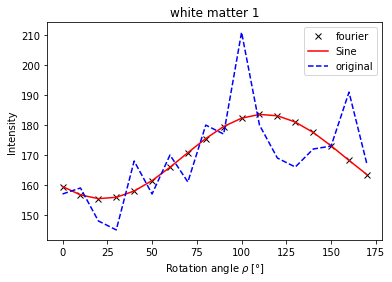

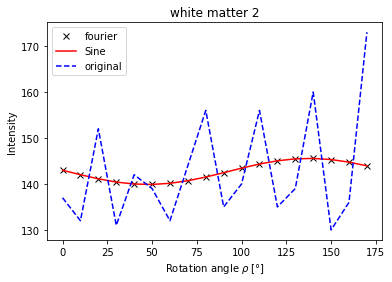

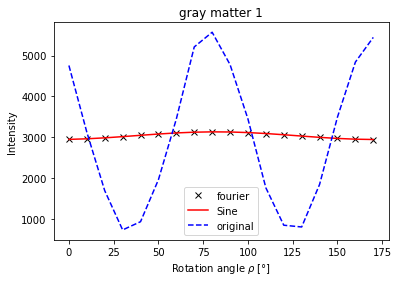

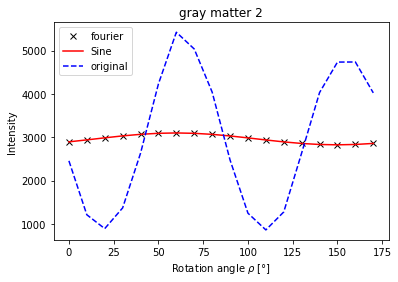

In [6]:
#Task2.3 Fitting function
plotIntensities(white_matter1, rotationAngle, "white matter 1")
plotIntensities(white_matter2, rotationAngle, "white matter 2")
plotIntensities(gray_matter1, rotationAngle, "gray matter 1")
plotIntensities(gray_matter2, rotationAngle, "gray matter 2")